# CMSE 802 In-class assignment: Artificial Neutral Networks Part 3
## Date: 11/15/2018
## Due: 11/15/2018; 10:30 PM
### Your name:
### The goal of this assignment is to learn more about ANN and existing  libraries.

---
### Your name: Boyao Zhu

---
The goal for this module is to build a learning system for handwritten digit regonition. We will approach this as any company in silicon valley would: with informed experimentation to try and get the most accurate system. You will have control over everything: the architecture of the network, hyperparameters, etc. The main libraries involved are **Keras ** and compatible backend engines .

<img src="https://keras.io/img/keras-logo-small.jpg " style="float:left;margin: 0px 30px 0px 0px;width: 100px;">
*Keras is a high-level neural networks library, written in Python and capable of running on top of either (Google's) TensorFlow, Theano (Université de Montréal) or CNTK (Microsoft). It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.*

*Keras was initially developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System).*

Source: https://keras.io/

---

### ANN application: digit recognition

<img src= https://www.tensorflow.org/versions/r0.8/images/mnist_digits.png>

</p>
We again will work on modeling a feedforward artificial neural network to classify the handwritten digits from the MNIST data set. We will do this using Keras. For now, let us get the data.

<img src= "https://ml4a.github.io/images/temp_fig_mnist.png" width="80%">
<p style="text-align: right;">From: Machine Learning for Artists - https://ml4a.github.io/</p>

---
**Load data. **

In [6]:
from __future__ import division, print_function

from keras.callbacks import Callback
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop
from keras.regularizers import l2
from keras.utils import np_utils

from sklearn import datasets
from sklearn.cross_validation import train_test_split

import numpy as np
import matplotlib.pyplot as plt

---
** Getting the normalized MNIST data: **

Here we will use the scikit-learn fetch_mldata method. This might take a few seconds.

In [11]:
dataset = datasets.fetch_mldata("Mnist Original")
X = dataset.data
X = X / 255.0
Y = np_utils.to_categorical(dataset.target.astype("int"), 10)

To make sure that everything went well, randomly pick ten images from the data set and plot them.

(70000, 784)


'\ndef plot_gallery(images, n_row=5, n_col=5):\n    """Helper function to plot a gallery of portraits"""\n    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))\n    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)\n    for i in range(n_row * n_col):\n        plt.subplot(n_row, n_col, i + 1)\n        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray_r)\n        plt.title(\'Pred=\'+str(pred_titles[i]*10), size=9)\n        plt.xlabel(\'Actual=\'+str(true_titles[i]*10), size=9)\n        plt.xticks(())\n        plt.yticks(())\n\n    plt.show()\n    \nplot_gallery(X[0:10,:], )\n'

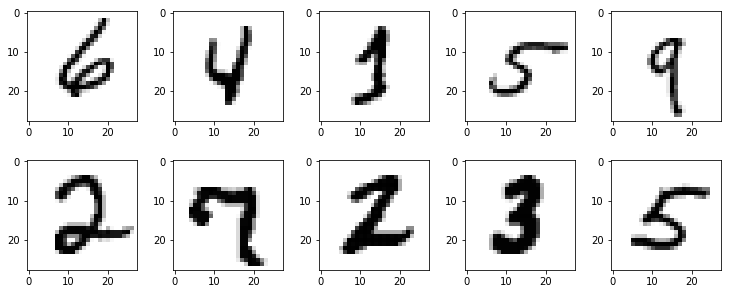

In [31]:
# Your code:
print (X.shape)
a = np.random.randint(0,70000,10)

plt.figure(figsize=(10,4))

plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[a[i]].reshape((28,28)), cmap=plt.cm.gray_r)


'''
def plot_gallery(images, n_row=5, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray_r)
        plt.title('Pred='+str(pred_titles[i]*10), size=9)
        plt.xlabel('Actual='+str(true_titles[i]*10), size=9)
        plt.xticks(())
        plt.yticks(())

    plt.show()
    
plot_gallery(X[0:10,:], )
'''

---
**Split data**

We split the data randomly into training, testing and validation sets. The random_state = 0 is so that we all get the same random partition.

In [32]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=10000, random_state=0)

Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=10000, random_state=0)

print(Xtrain.shape, Xval.shape, Xtest.shape, Ytrain.shape, Yval.shape, Ytest.shape)

(50000, 784) (10000, 784) (10000, 784) (50000, 10) (10000, 10) (10000, 10)


---

### Neural networks in Keras: 

The type of network we've been using so far, a fully connected network (FCN), in which information only flows in one direction (Feedforward FCN), is implemented in Keras using the Sequential class. Most of what you need can be found here:

https://keras.io/getting-started/sequential-model-guide/

A list of methods and their inputs can be found here:

https://keras.io/models/sequential/

**Build a simple feedforward FCN using Keras.**  Please investigate the functions Sequential( ), model.add( ), model.complie( ), and use them in the cell below. 

In [112]:
# First we instantiate the model
model = Sequential() # <== fill the blank


# Next we add the first two layers. Dense means that is fully connected, 
# the input layer has size 784= 28x28 , 
# and the second layer has 5 units. A bias term can be added by including bias=True
# the activation function is a sigmoid, but this can be changed.
model.add(Dense(784, input_dim=784 , activation=('sigmoid'),bias=True)) # <== fill the blank
#model.add(Dense(5, activation=('sigmoid'), bias=True))

# More hidden layers can be added here using model.add(Dense(n_nodes= , activation = ' ', bias=  ))


# The output layer has ten units, one for each digit class, 
# and the activation functions are sigmoids. 
# Notice that different layers can have different activation functions.
model.add(Dense(10, activation=('sigmoid')  )) # <== fill the blank


# The type of minimization algorithm we will use is stochastic gradient descent (SGD) 
# with learning rate = 0.1.
sgd = SGD(lr=0.1)


# Finally, we form the model to be trained. Let's use mean squared error to evaluate the 
# loss function.
model.compile(loss='mse'  , optimizer=sgd, metrics=['accuracy']) # <== fill the blank


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="sigmoid", use_bias=True)`
  if __name__ == '__main__':


In [113]:
# Here is a simple summary of the neutral network

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [114]:
# custom callback, to see what's going on while training happens

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracies = []
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get("loss"))
        self.accuracies.append(logs.get("acc"))

In [115]:
       
history = LossHistory()

Investigate the function model.fit( ) to train the neutral network.

In [116]:
# now we train the model

# Fill the blank in the function below.
model.fit(Xtrain ,Ytrain   , batch_size=100, nb_epoch=10, shuffle=True, validation_data=(Xtest,Ytest), callbacks=[history])



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 85us/step - loss: 0.0888 - acc: 0.3067 - val_loss: 0.0852 - val_acc: 0.4446
Epoch 2/10
50000/50000 [==============================] - 4s 79us/step - loss: 0.0821 - acc: 0.4921 - val_loss: 0.0787 - val_acc: 0.5689
Epoch 3/10
50000/50000 [==============================] - 4s 79us/step - loss: 0.0749 - acc: 0.6043 - val_loss: 0.0712 - val_acc: 0.6323
Epoch 4/10
50000/50000 [==============================] - 4s 80us/step - loss: 0.0675 - acc: 0.6705 - val_loss: 0.0641 - val_acc: 0.7196
Epoch 5/10
50000/50000 [==============================] - 4s 80us/step - loss: 0.0611 - acc: 0.7134 - val_loss: 0.0581 - val_acc: 0.7399
Epoch 6/10
50000/50000 [==============================] - 4s 82us/step - loss: 0.0558 - acc: 0.7437 - val_loss: 0.0534 - val_acc: 0.7590
Epoch 7/10
50000/50000 [==============================] - 4s 81us/step - loss: 0.0515 - acc: 0.7677 - val_loss: 0.0494 - val_acc

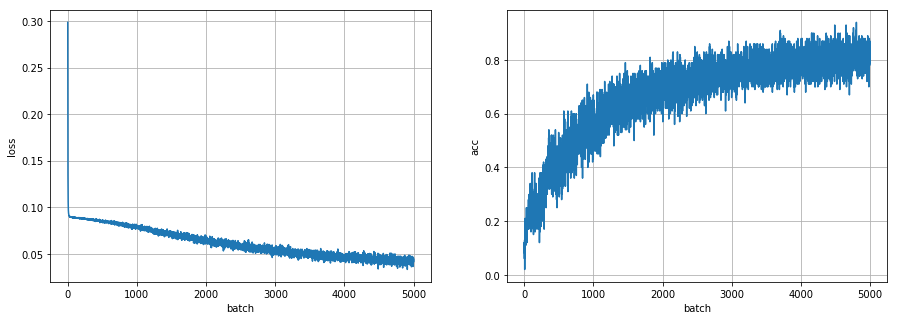

In [117]:
# one can plot how the loss ( in this case, the mean squared error) and 
# accuracy changed as training went on

plt.figure(1,figsize=(15, 5))
plt.subplot(121)
plt.plot(range(len(history.losses)), history.losses)
plt.xlabel("batch")
plt.ylabel("loss")
plt.grid()

plt.subplot(122)
plt.plot(range(len(history.accuracies)), history.accuracies)
plt.xlabel("batch")
plt.ylabel("acc")
plt.grid()


plt.show()

---
### Visualization:

One can check how the model does in 10 randomly chosen images. The percentage of correct classifications, averaged over several trials, should approach the test accuracy acomputed above.

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


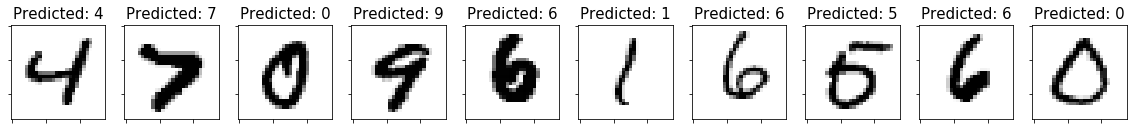

In [118]:
Xvals = np.zeros((10, Xval.shape[1]))

for idx, i in enumerate(np.random.randint(0, Xval.shape[0], 10)):
    Xvals[idx, :] = Xval[i]

Y_ = model.predict(Xvals)


fig = plt.figure(2,figsize=(20, 5))

for i in range(10):
    img = Xvals[i].reshape((28, 28))
    a=fig.add_subplot(1,10,i+1)
    
    g = np.argmax(Y_[i,:])
    
    a.set_title('Predicted: '+str(g), size=15)
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.imshow(img,cmap=plt.cm.gray_r)
    
plt.show()

---
### Activity:

** Build the most accurate digit recognition system you can. What is your strategy to increase the accuracy. **

**Your answer: **  Add more layers, and use different activation function like relu

---
### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Dropbox > In-class Assignment 20181115".